In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics

In [2]:
digits = datasets.load_digits()

In [3]:
for k, v in digits.items():
    try:
        print(k, '=>', v.shape)
    except:
        print(k)

data => (1797, 64)
target => (1797,)
target_names => (10,)
images => (1797, 8, 8)
DESCR


In [19]:
type(digits['DESCR'])

str

In [20]:
len(digits['DESCR'])

2014

In [21]:
digits['DESCR'][:100]

'Optical Recognition of Handwritten Digits Data Set\n================================================='

In [9]:
imgs_labels = list(zip(digits.images, digits.target))

In [41]:
len(imgs_labels)

1797

In [55]:
import random
import numpy as np

n_samples = len(imgs_labels)

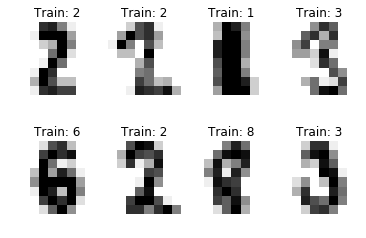

In [56]:
for indx, (img, label) in enumerate(np.array(imgs_labels)[random.sample(range(0, n_samples), 8)]):
    plt.subplot(2,4, indx+1)
    plt.axis('off')
    plt.imshow(img, cmap=plt.cm.gray_r)
    plt.title('Train: %i' % label)
plt.show()

In [70]:
import math

p = 0.7

dat = digits.images.reshape((n_samples, -1))
indices = np.random.permutation(dat.shape[0])
point_of_sep = math.ceil(len(indices)*p)

train_indx = indices[:point_of_sep]
test_indx = indices[point_of_sep:]

train = dat[train_indx,]
test = dat[test_indx,]

In [72]:
clf = svm.SVC(gamma=.001)
clf.fit(train, digits.target[train_indx]) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [105]:
pred = clf.predict(test)

In [84]:
print('Accuracy: %s' % str(sum(digits.target[test_indx]==pred)/len(pred)))

Accuracy: 0.990723562152


In [98]:
print('Confusion matrix:\n\n%s' % metrics.confusion_matrix(digits.target[test_indx], pred))

Confusion matrix:

[[52  0  0  0  0  0  0  0  0  0]
 [ 0 63  0  0  0  0  0  0  0  0]
 [ 0  0 55  0  0  0  0  0  0  0]
 [ 0  0  0 51  0  0  0  0  0  0]
 [ 0  0  0  0 55  0  0  0  0  0]
 [ 0  0  0  0  0 51  1  0  0  1]
 [ 0  0  0  0  0  0 53  0  0  0]
 [ 0  0  0  0  0  0  0 49  0  0]
 [ 0  1  0  0  0  0  0  0 55  1]
 [ 0  1  0  0  0  0  0  0  0 50]]


In [97]:
print(metrics.classification_report(digits.target[test_indx], pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        52
          1       0.97      1.00      0.98        63
          2       1.00      1.00      1.00        55
          3       1.00      1.00      1.00        51
          4       1.00      1.00      1.00        55
          5       1.00      0.96      0.98        53
          6       0.98      1.00      0.99        53
          7       1.00      1.00      1.00        49
          8       1.00      0.96      0.98        57
          9       0.96      0.98      0.97        51

avg / total       0.99      0.99      0.99       539



/Users/r3dmaohong/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


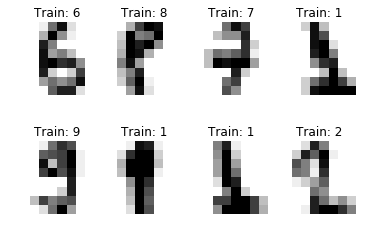

In [116]:
imgs_preds = list(zip(digits.images[test_indx], pred))
for indx, (img, prd) in enumerate(np.array(imgs_preds)[random.sample(range(0, len(pred)), 8)]):
    plt.subplot(2,4, indx+1)
    plt.axis('off')
    plt.imshow(img, cmap=plt.cm.gray_r)
    plt.title('Train: %i' % prd)
plt.show()